In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

In [2]:
from sklearn.preprocessing import OrdinalEncoder

In [3]:
data_dir = "../data/"
fig_dir = "../figures/"

In [4]:
def check_missing(df, axis=0):
    
    misses = df.isna().sum(axis=axis)
    return np.divide(misses.values, df.shape[0])

### Main prediction problem

In [5]:
train_1 = pd.read_csv(data_dir + "primary_training_part1.csv")

In [6]:
check_missing(train_1)

array([0., 0., 0., 0., 0., 0., 0.])

In [7]:
train_1.head()

,PTID,MonthID,WhitePlayer,BlackPlayer,WhiteScore,WhitePlayerPrev,BlackPlayerPrev
0,1,1,47,8911,0.0,0,0
1,2,1,47,46743,0.5,0,0
2,3,1,70,40287,0.5,0,0
3,4,1,90,8188,1.0,0,0
4,5,1,90,31200,0.0,0,0


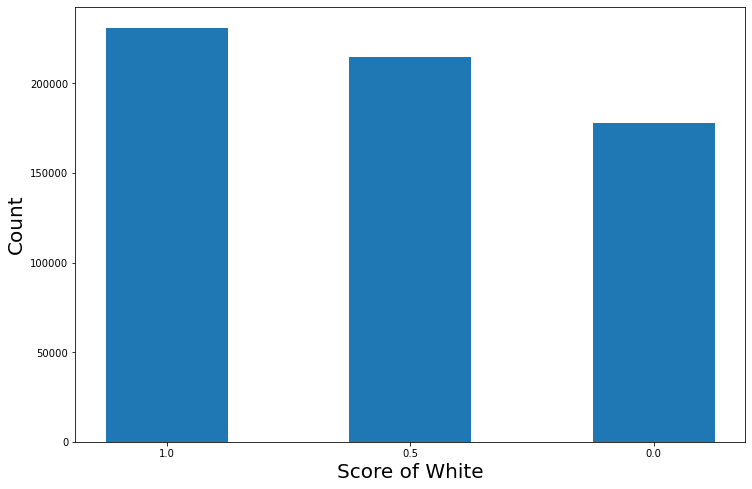

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xticks(list(range(4)))
ax.set_xticklabels(list(train_1.WhiteScore.value_counts().index))
plt.bar(list(range(3)), train_1.WhiteScore.value_counts().values, 0.5)
plt.xlabel("Score of White", size=20)
plt.ylabel("Count", size=20)
# fig.text(0.2, 0, "[2] Statistics of white wins in all games in first 96 months.", size=15)
plt.savefig(fig_dir + "white_win.png")

# plt.grid(False)
# plt.grid(axis='x')

In [8]:
train_1[["WhiteScore", "WhitePlayerPrev", "BlackPlayerPrev"]]

,WhiteScore,WhitePlayerPrev,BlackPlayerPrev
0,0.0,0,0
1,0.5,0,0
2,0.5,0,0
3,1.0,0,0
4,0.0,0,0
...,...,...,...
624143,0.5,13,136
624144,0.5,13,9
624145,0.5,13,5
624146,0.5,13,65


In [9]:
train_1.groupby("WhitePlayerPrev").WhiteScore.mean()

WhitePlayerPrev
0      0.443674
1      0.422117
2      0.443229
3      0.449542
4      0.449007
         ...   
337    0.777778
338    0.805556
341    0.900000
343    0.727273
347    0.666667
Name: WhiteScore, Length: 292, dtype: float64

In [10]:
train_1.groupby("WhitePlayerPrev").WhiteScore.count().index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            329, 331, 332, 333, 336, 337, 338, 341, 343, 347],
           dtype='int64', name='WhitePlayerPrev', length=292)

In [18]:
train_1.shape

(624148, 8)

In [12]:
train_1["PrevDiff"] = train_1.WhitePlayerPrev - train_1.BlackPlayerPrev

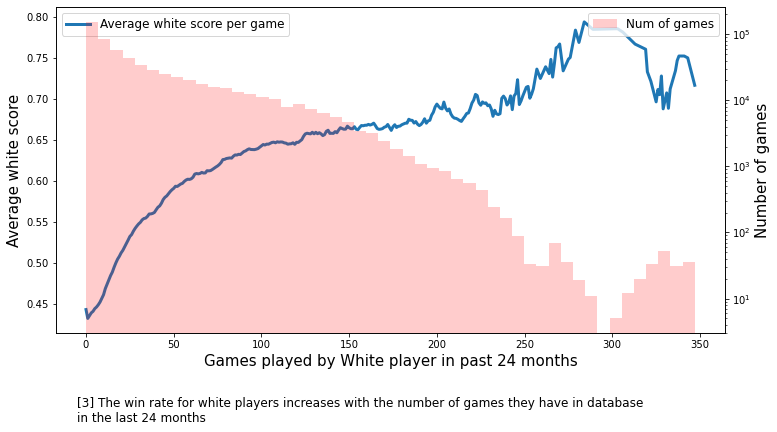

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_1.groupby("WhitePlayerPrev").WhiteScore.mean().rolling(10, min_periods=1).mean(), linewidth=3, label="Average white score per game")
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel("Average white score", size=15)
ax.set_xlabel("Games played by White player in past 24 months", size=15)
ax2 = ax.twinx()
ax2.hist(train_1.WhitePlayerPrev, bins=50, color='r', alpha=0.2, log=True, label='Num of games')
ax2.legend(loc='upper right', fontsize=12)
ax2.set_ylabel("Number of games", size=15)
fig.text(0.15, -0.08, """[3] The win rate for white players increases with the number of games they have in database\nin the last 24 months""", size=12)

plt.savefig(fig_dir + "white_pre.png")

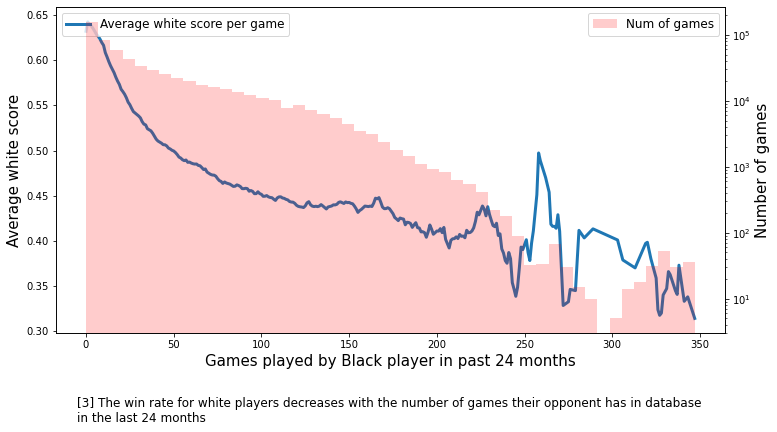

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_1.groupby("BlackPlayerPrev").WhiteScore.mean().rolling(10, min_periods=1).mean(), linewidth=3, label="Average white score per game")
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel("Average white score", size=15)
ax.set_xlabel("Games played by Black player in past 24 months", size=15)
ax2 = ax.twinx()
ax2.hist(train_1.BlackPlayerPrev, bins=50, color='r', alpha=0.2, log=True, label='Num of games')
ax2.legend(loc='upper right', fontsize=12)
ax2.set_ylabel("Number of games", size=15)
fig.text(0.15, -0.08, """[3] The win rate for white players decreases with the number of games their opponent has in database\nin the last 24 months""", size=12)

plt.savefig(fig_dir + "black_pre.png")

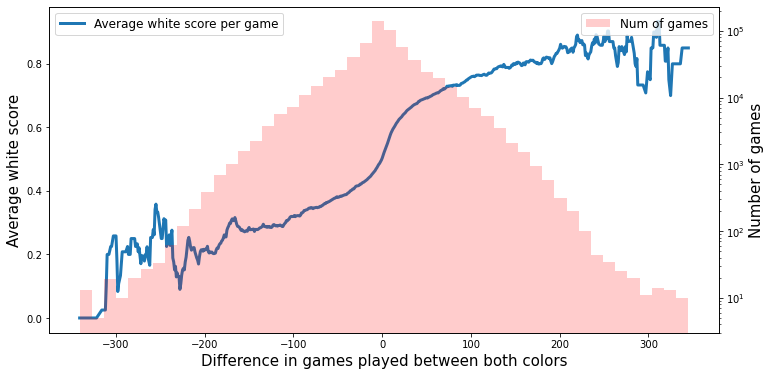

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_1.groupby("PrevDiff").WhiteScore.mean().rolling(10, min_periods=1).mean(), linewidth=3, label="Average white score per game")
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel("Average white score", size=15)
ax.set_xlabel("Difference in games played between both colors", size=15)
ax2 = ax.twinx()
ax2.hist(train_1.PrevDiff, bins=50, color='r', alpha=0.2, log=True, label='Num of games')
ax2.legend(loc='upper right', fontsize=12)
ax2.set_ylabel("Number of games", size=15)
# fig.text(0.15, -0.08, """[3] The win rate for white players decreases with the number of games their opponent has in database\nin the last 24 months""", size=12)

plt.savefig(fig_dir + "diff_pre.png")

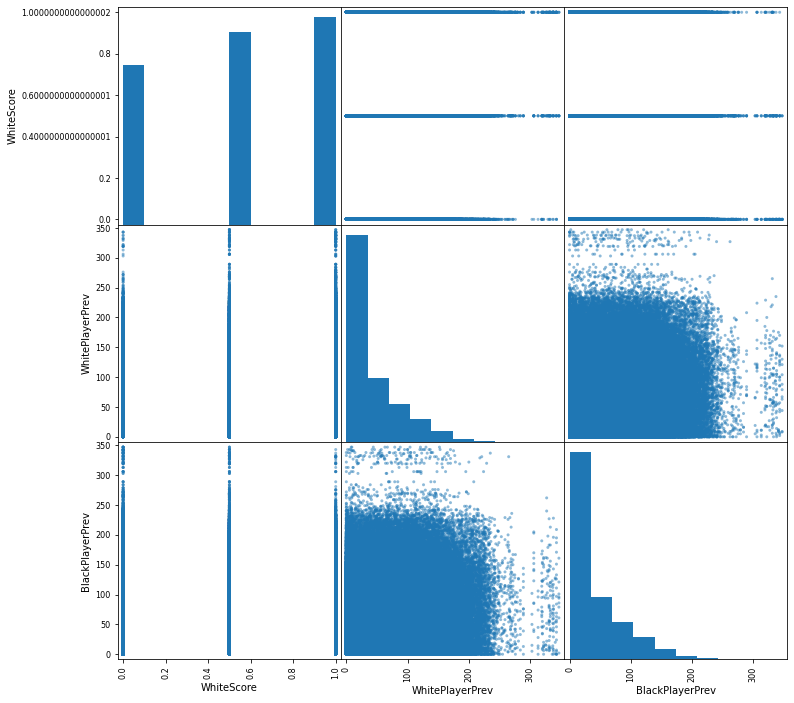

In [11]:
pd.plotting.scatter_matrix(train_1[["WhiteScore", "WhitePlayerPrev", "BlackPlayerPrev"]], figsize=(12, 12))
plt.show()

In [142]:
rating = pd.read_csv(data_dir + "initial_ratings.csv")

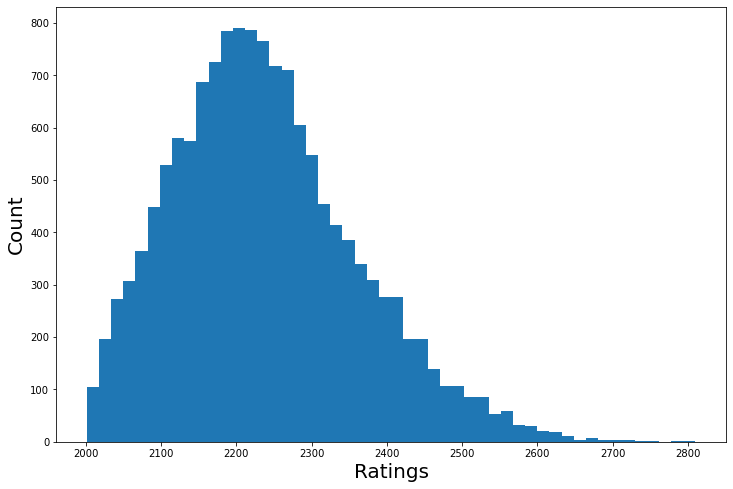

In [151]:
fig = plt.figure(figsize=(12, 8))
plt.hist(rating.Rating, bins=50)
plt.xlabel("Ratings", size=20)
plt.ylabel("Count", size=20)
# fig.text(0.15, -0.01, "[1] The rating distribution of 18,000 players, before the first match in the dataset", size=15)
plt.savefig(fig_dir + "ratings_hist.png")

# plt.grid(False)
# plt.grid(axis='x')

In [124]:
list(train_1.WhiteScore.value_counts().index)

[1.0, 0.5, 0.0]

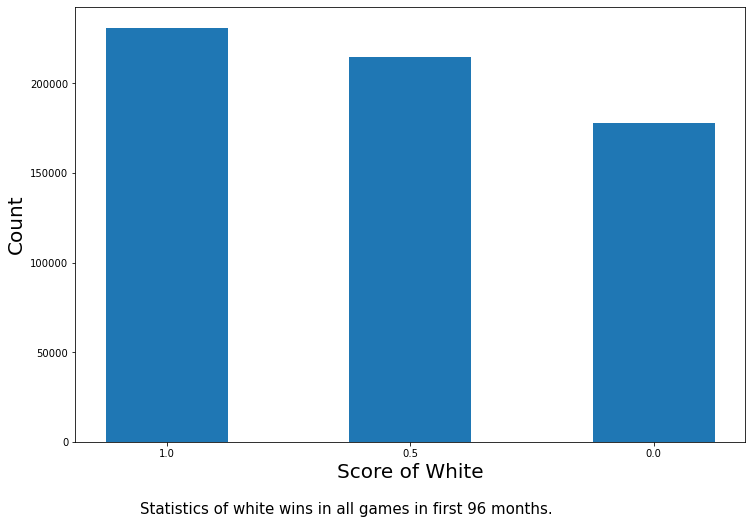

In [27]:
train_1.tail()

,PTID,MonthID,WhitePlayer,BlackPlayer,WhiteScore,WhitePlayerPrev,BlackPlayerPrev
624143,624144,96,54198,18669,0.5,13,136
624144,624145,96,54198,23069,0.5,13,9
624145,624146,96,54198,33612,0.5,13,5
624146,624147,96,54198,37721,0.5,13,65
624147,624148,96,54198,44952,1.0,13,26


### Elo RevEnge

In [41]:
games = pd.read_csv(data_dir + "games.csv")
stats = games.drop('moves', axis=1)
stats.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [42]:
stats["tot_time"] = [i.split('+')[0] for i in stats.increment_code]
stats["increment"] = [i.split('+')[1] for i in stats.increment_code]
stats = stats.drop("increment_code", axis=1)

wins = [['black', 'draw', 'white']]
Ord = OrdinalEncoder(categories=wins)
stats["winner"] = Ord.fit_transform(stats.winner.values.reshape(-1, 1))
stats.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply,tot_time,increment
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,2.0,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5,15,2
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,0.0,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,5,10
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,2.0,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3,5,10
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,2.0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3,20,0
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,2.0,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5,30,3


In [43]:
stats.victory_status.value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

In [61]:
re.split(r"[\s]*[abc][\s]*", "ssassbssc")

['ss', 'ss', 'ss', '']

In [62]:
opening = []
sub_opening_1 = []
sub_opening_2 = []
for openings in stats.opening_name:
    comb = re.split(r"[\s]*[:|][\s]*", openings)
    opening.append(comb[0])
    try:
        sub_opening_1.append(comb[1])
    except IndexError:
        sub_opening_1.append(None)
    try:
        sub_opening_2.append(comb[2])
    except IndexError:
        sub_opening_2.append(None)

In [63]:
stats["opening"] = opening
stats["sub_opening_1"] = sub_opening_1
stats["sub_opening_2"] = sub_opening_2

In [119]:
stats.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply,tot_time,increment,opening,sub_opening,sub_opening_1,sub_opening_2
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,2.0,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5,15,2,Slav Defense,Exchange Variation,Exchange Variation,None
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,0.0,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,5,10,Nimzowitsch Defense,Kennedy Variation,Kennedy Variation,None
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,2.0,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3,5,10,King's Pawn Game,Leonardis Variation,Leonardis Variation,None
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,2.0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3,20,0,Queen's Pawn Game,Zukertort Variation,Zukertort Variation,None
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,2.0,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5,30,3,Philidor Defense,None,None,None


In [181]:
stats.victory_status.value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

In [168]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [237]:
step = 0.02
ls = [stats.rating_mean.quantile(i) for i in np.arange(step, 1 + step, step)]

In [238]:
def make_bin(col, bins):
    ans = []
    for c in col:
        for n, b in enumerate(bins):
            if b >= c:
                ans.append(n)
                break
    return ans

In [239]:
len(make_bin(stats.rating_mean, ls))

20058

In [240]:
stats['rating_diff'] = stats.white_rating - stats.black_rating
stats['rating_mean'] = (stats.white_rating + stats.black_rating) // 2
stats['diff_bin'] = make_bin(stats.rating_diff, ls)

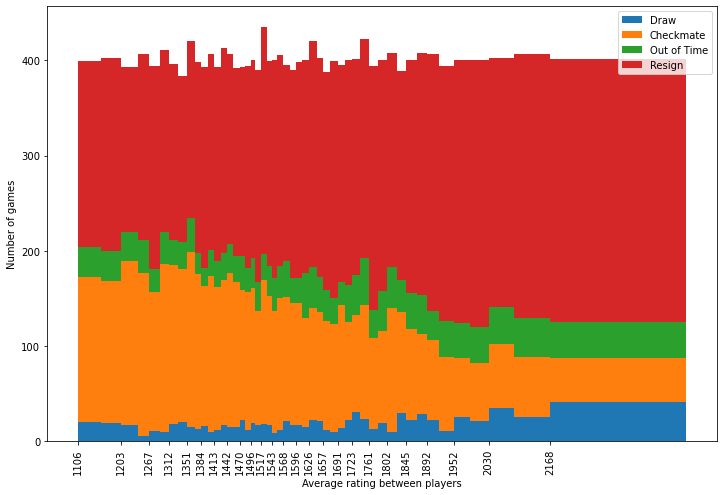

In [258]:
fig = plt.figure(figsize=(12, 8))
np1 = stats[stats['victory_status'] == 'draw'].groupby("diff_bin").winner.count().values
np2 = stats[stats['victory_status'] == 'mate'].groupby("diff_bin").winner.count().values
np3 = stats[stats['victory_status'] == 'outoftime'].groupby("diff_bin").winner.count().values
np4 = stats[stats['victory_status'] == 'resign'].groupby("diff_bin").winner.count().values
# plt.bar(ls, np1, width=10)
plt.hist([stats[stats['victory_status'] == 'draw'].rating_mean, 
          stats[stats['victory_status'] == 'mate'].rating_mean,
          stats[stats['victory_status'] == 'outoftime'].rating_mean,
          stats[stats['victory_status'] == 'resign'].rating_mean], 
         histtype='bar', 
         stacked=True,
         label=['Draw', 'Checkmate', 'Out of Time', 'Resign'],
         bins=ls
        )
plt.legend()
plt.xticks(ls[0::2], rotation=90)
plt.xlabel("Average rating between players")
plt.ylabel("Number of games")
# plt.xlim((-1000, 1000))
# plt.ylim((1000, 2000))
plt.savefig(fig_dir + "result_vs_rating.png", bbox_inches='tight')

(800.0, 2500.0)

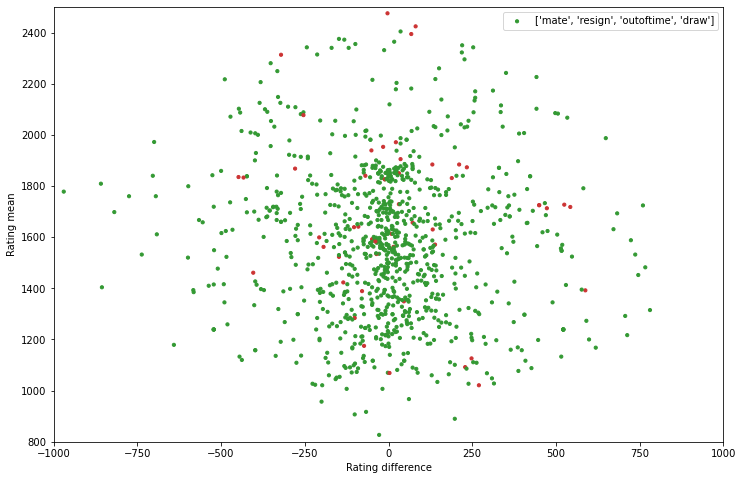

In [226]:
color_list = [(0.8, 0.2, 0.2) if i == 'draw' else (0.2, 0.6, 0.2) for i in stats.victory_status]
fig = plt.figure(figsize=(12, 8))
n = 1000
plt.scatter(stats['rating_diff'][:n], stats['rating_mean'][:n], s=10, c=color_list[:n], label=['mate', 'resign', 'outoftime', 'draw'])
plt.legend()
plt.xlabel("Rating difference")
plt.ylabel("Rating mean")
plt.xlim((-1000, 1000))
plt.ylim((800, 2500))

In [65]:
set(opening)

{'Alekhine Defense',
 'Alekhine Defense #2',
 'Alekhine Defense #3',
 'Amar Opening',
 'Amazon Attack',
 'Anderssen Opening',
 'Australian Defense',
 'Barnes Defense',
 'Barnes Opening',
 'Benko Gambit',
 'Benko Gambit Accepted',
 'Benko Gambit Declined',
 'Benoni Defense',
 'Bird Opening',
 "Bishop's Opening",
 'Blackmar-Diemer Gambit',
 'Blackmar-Diemer Gambit #2',
 'Blackmar-Diemer Gambit Declined',
 'Blumenfeld Countergambit #2',
 'Blumenfeld Countergambit Accepted',
 'Bogo-Indian Defense',
 'Borg Defense',
 'Budapest Defense',
 'Canard Opening',
 'Caro-Kann Defense',
 'Caro-Kann Defense #2',
 'Carr Defense',
 'Catalan Opening',
 'Center Game',
 'Center Game #2',
 'Center Game Accepted',
 'Clemenz Opening',
 'Colle System',
 'Colle System #2',
 'Crab Opening',
 'Creepy Crawly Formation',
 'Czech Defense',
 'Danish Gambit',
 'Danish Gambit Accepted',
 'Danish Gambit Declined',
 'Doery Defense',
 'Duras Gambit',
 'Dutch Defense',
 'East Indian Defense',
 'Elephant Gambit',
 'English 

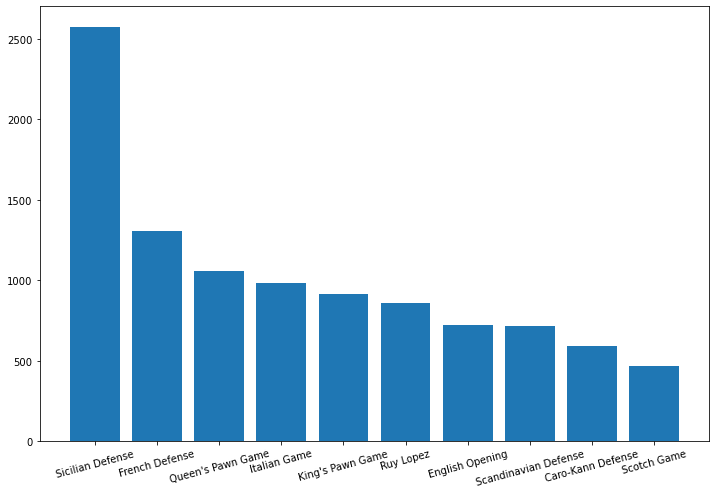

In [88]:
n = 10
fig = plt.figure(figsize=(12, 8))
plt.bar(stats.opening.value_counts().index[:n], stats.opening.value_counts().values[:n])
plt.xticks(rotation=15, ha='center')
plt.savefig(fig_dir + "opening_stat.png")

In [93]:
popular = stats.groupby("opening").winner.count() > 200

In [98]:
opening_stats = stats.groupby("opening").winner.mean()[popular]

In [102]:
st_opening_stats = sorted(zip(opening_stats.keys(), opening_stats.values), key=lambda x:x[1])

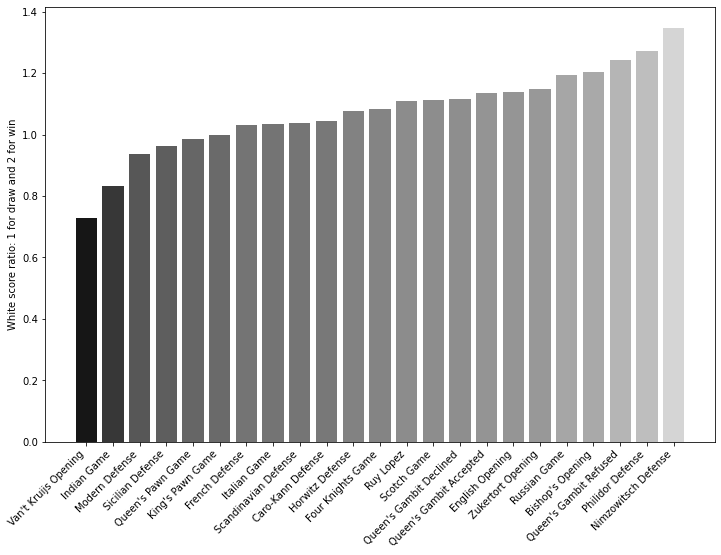

In [118]:
fig = plt.figure(figsize = (12, 8))
imax = max([i[1] for i in st_opening_stats]) * 1.1
imin = min([i[1] for i in st_opening_stats]) * 0.9
plt.bar([i[0] for i in st_opening_stats], [i[1] for i in st_opening_stats], color=[[(i[1] - imin) / (imax - imin)] * 3 for i in st_opening_stats])
plt.ylabel("White score ratio: 1 for draw and 2 for win")
plt.xticks(rotation = 45, ha='right')
plt.savefig(fig_dir + "opening_wins.png", bbox_inches='tight')

In [33]:
stats.isna().sum(axis=0)

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
white_id          0
white_rating      0
black_id          0
black_rating      0
opening_eco       0
opening_name      0
opening_ply       0
tot_time          0
increment         0
dtype: int64